In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
12,878 cases (7 day average) as of Sat 26 Jun, +895.6 since Fri 25 Jun
227 hospitalised (7 day average) as of Tue 29 Jun, +14.4 since Mon 28 Jun
12 died (7 day average) as of Sat 26 Jun, -1.3 since Fri 25 Jun


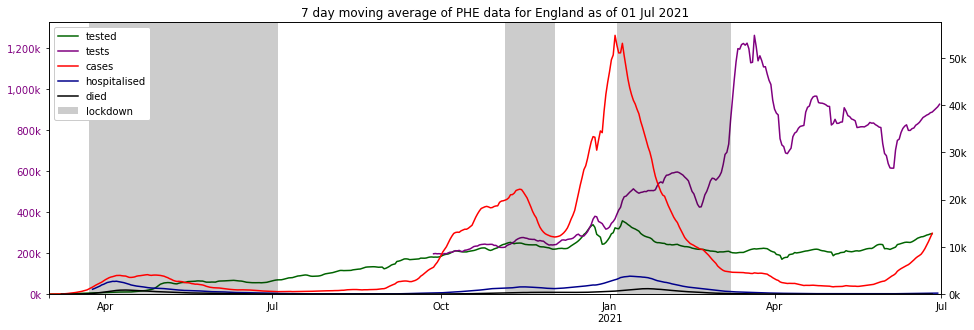

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

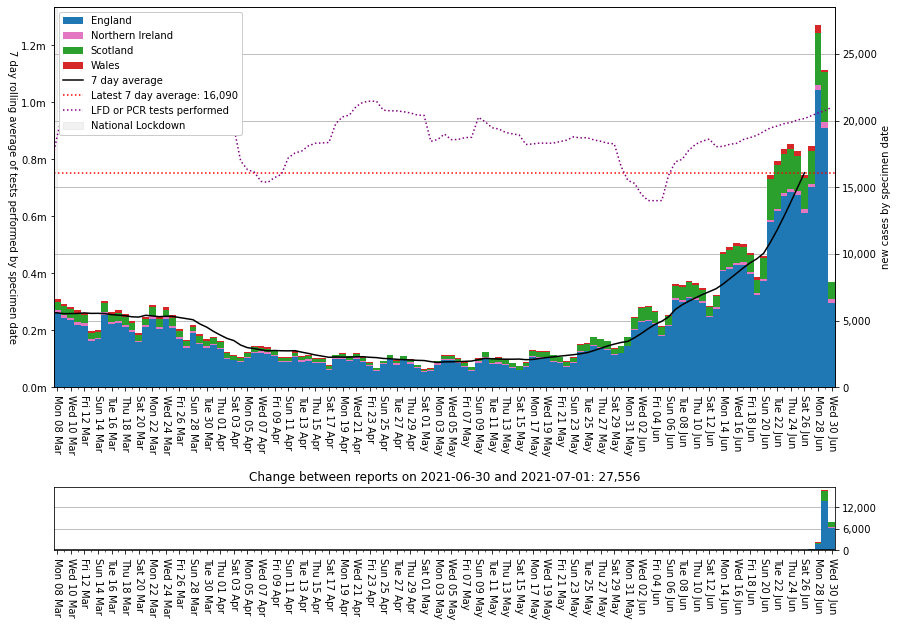

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

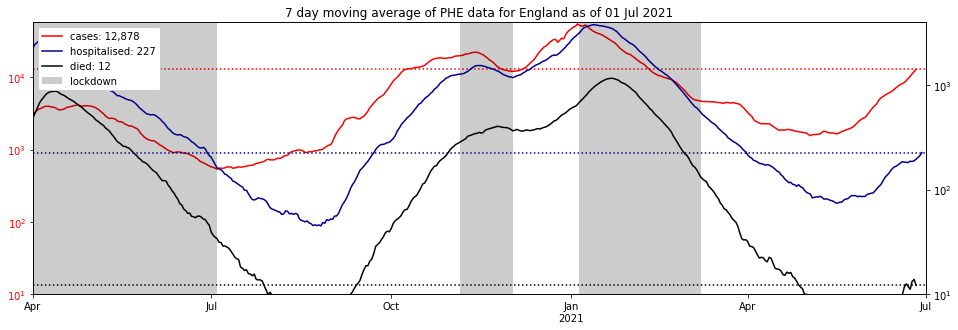

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,),
             right_series=(s.new_admissions_sum, s.new_deaths_sum))

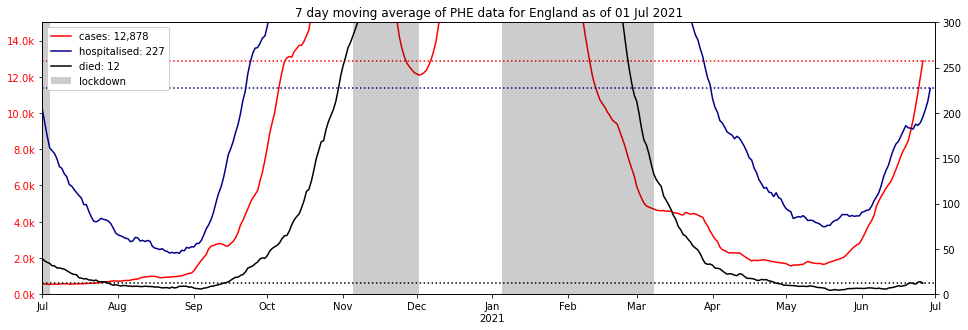

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=15_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=300)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,30 Jun 21,"+27,776,520","+37,618,263","+27,776,520","+138,993","+120,497","+138,993"
Northern Ireland,30 Jun 21,"+871,216","+1,166,842","+871,216","+8,284","+2,050","+8,284"
Scotland,30 Jun 21,"+2,722,725","+3,816,251","+2,722,725","+10,488","+16,784","+10,488"
Wales,30 Jun 21,"+1,677,738","+2,259,622","+1,677,738","+17,984","+1,885","+17,984"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,27776520.0,37618263.0,9841743.0,56286961,49.348054,17.484943,33.167003
1,Northern Ireland,N92000002,871216.0,1166842.0,295626.0,1893667,46.006822,15.611298,38.381880
2,Scotland,S92000003,2722725.0,3816251.0,1093526.0,5463300,49.836637,20.015851,30.147512
3,Wales,W92000004,1677738.0,2259622.0,581884.0,3152879,53.212889,18.455640,28.331471


'partial: 44,860,978 (67.2%), full: 33,048,199'

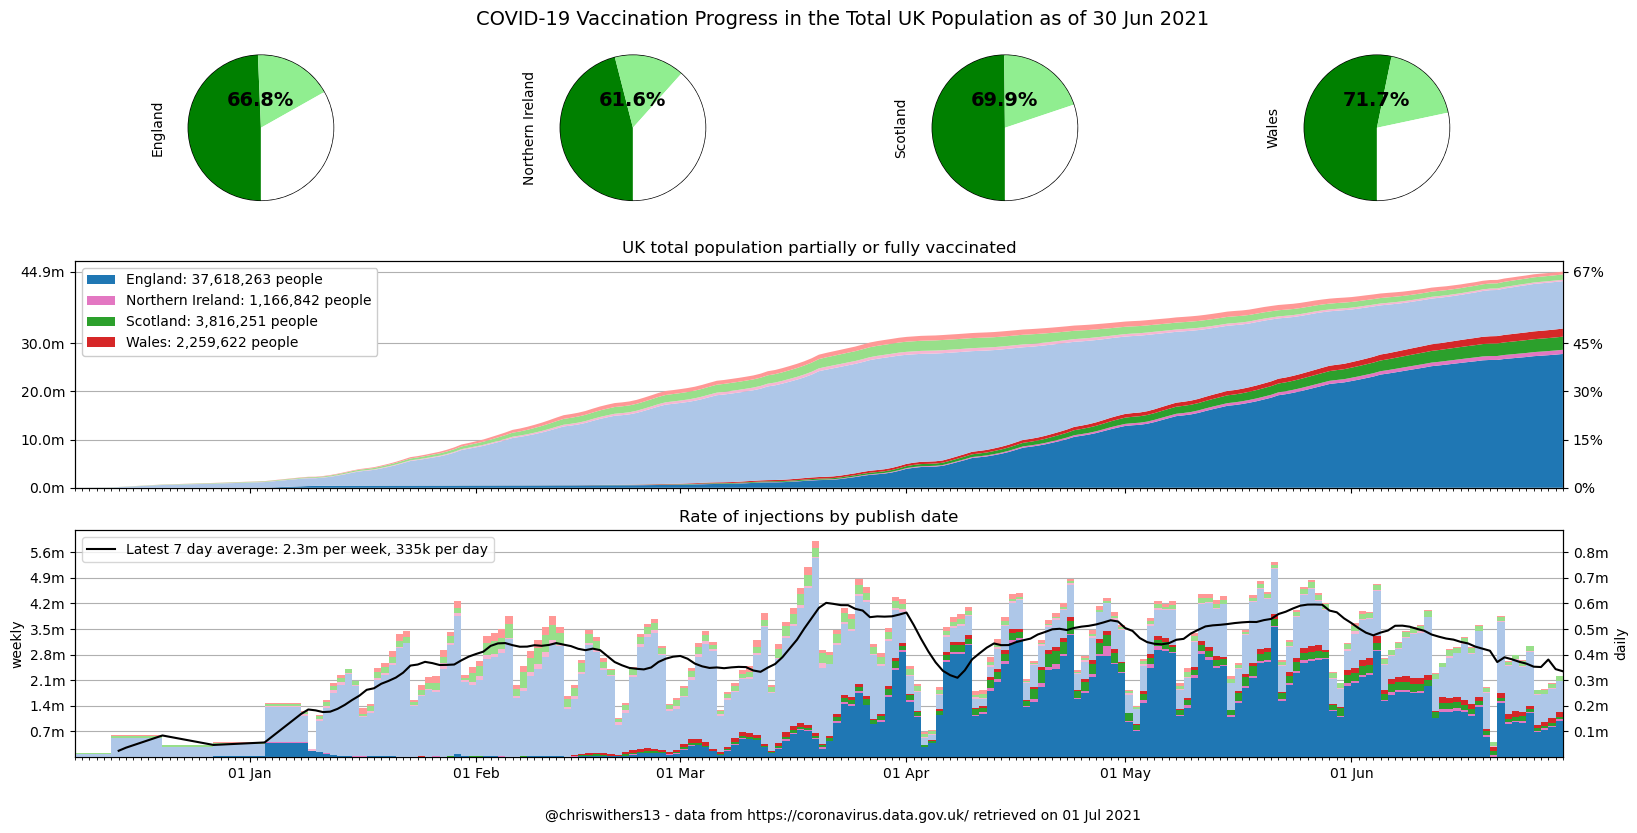

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

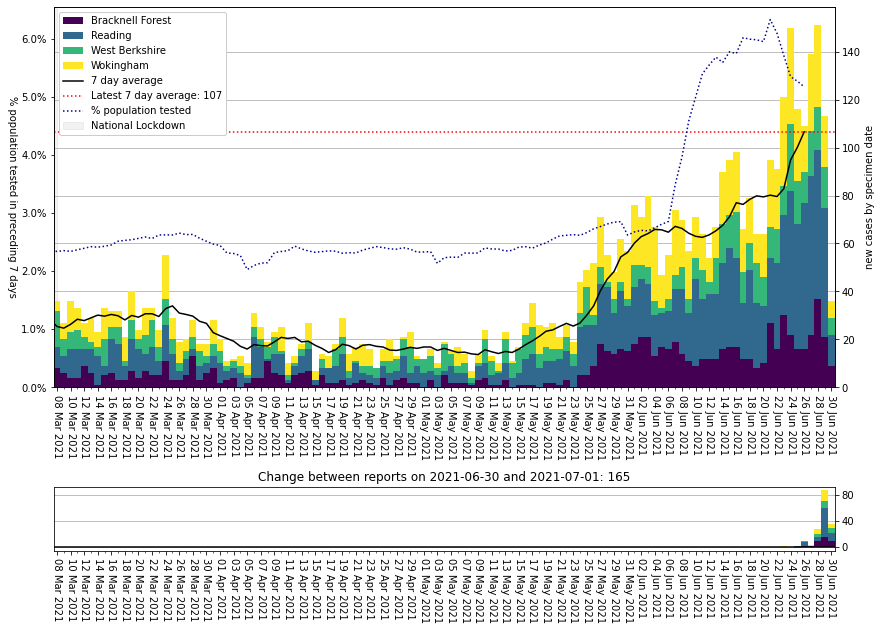

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=unique_people_tested)

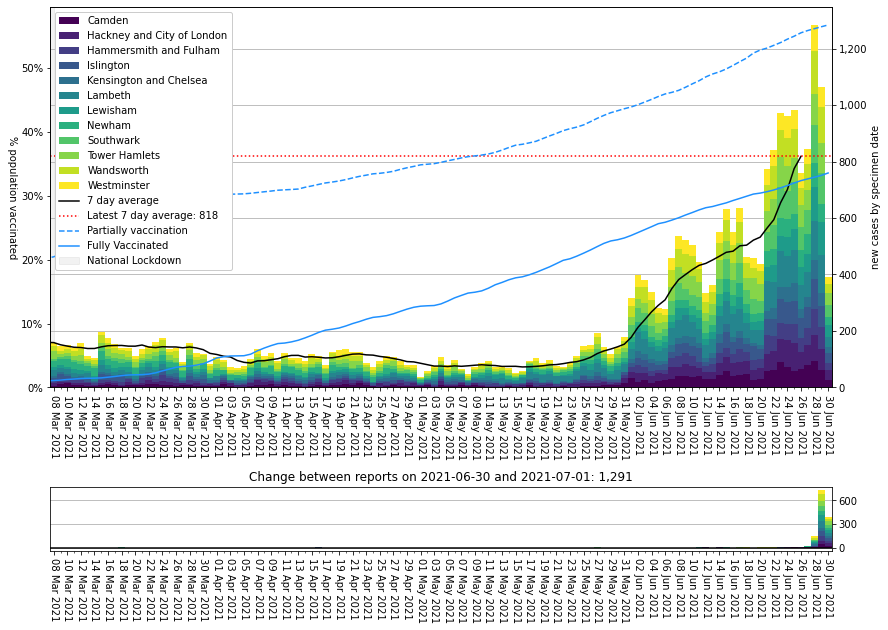

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000042,Dundee City,756.763997,1130.0,2021-06-30
S12000019,Midlothian,627.298291,580.0,2021-06-30
E08000021,Newcastle upon Tyne,575.589459,1743.0,2021-06-30
E07000199,Tamworth,555.439658,426.0,2021-06-30
S12000010,East Lothian,543.468111,582.0,2021-06-30
E08000023,South Tyneside,530.547902,801.0,2021-06-30
S12000036,City of Edinburgh,528.451413,2774.0,2021-06-30
E07000125,Rossendale,526.006547,376.0,2021-06-30
E07000120,Hyndburn,519.477315,421.0,2021-06-30


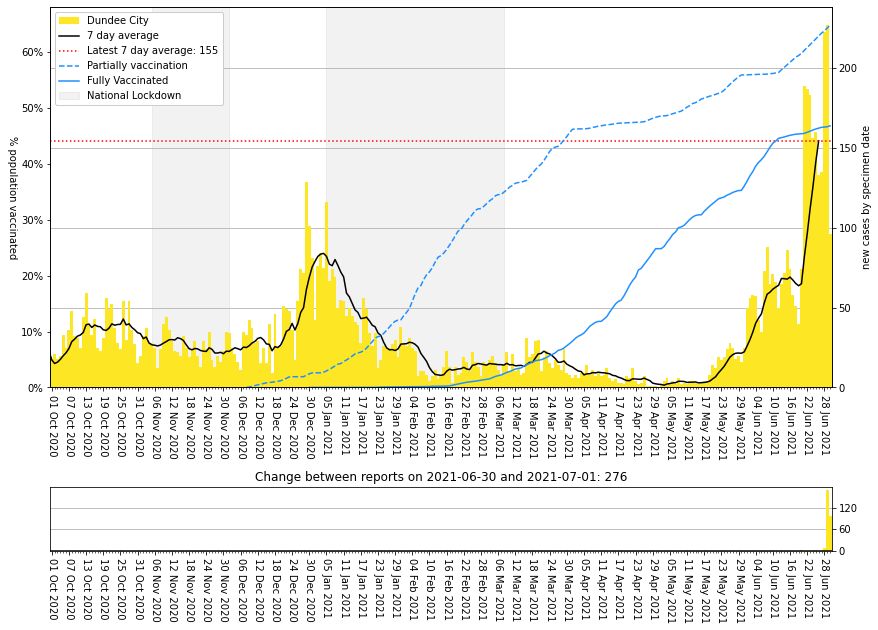

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,361.222938,2865.0,2021-06-30
S12000036,City of Edinburgh,528.451413,2774.0,2021-06-30
S12000049,Glasgow City,401.503664,2542.0,2021-06-30
E08000025,Birmingham,220.438319,2517.0,2021-06-30
E06000047,County Durham,472.934989,2507.0,2021-06-30
E08000003,Manchester,434.650489,2403.0,2021-06-30
E08000012,Liverpool,378.482136,1885.0,2021-06-30
E08000021,Newcastle upon Tyne,575.589459,1743.0,2021-06-30
S12000047,Fife,370.499264,1384.0,2021-06-30


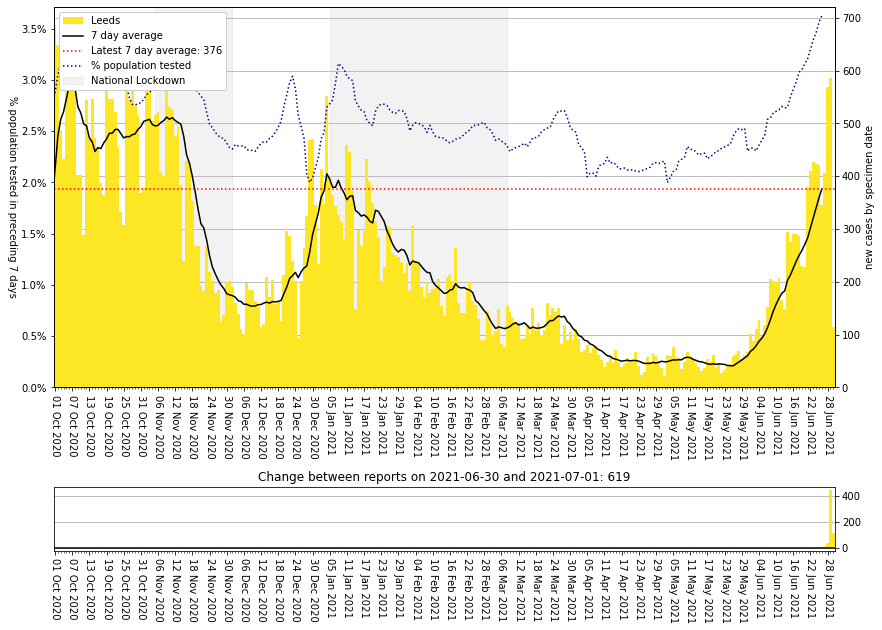

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.5
phe_max = 0.7

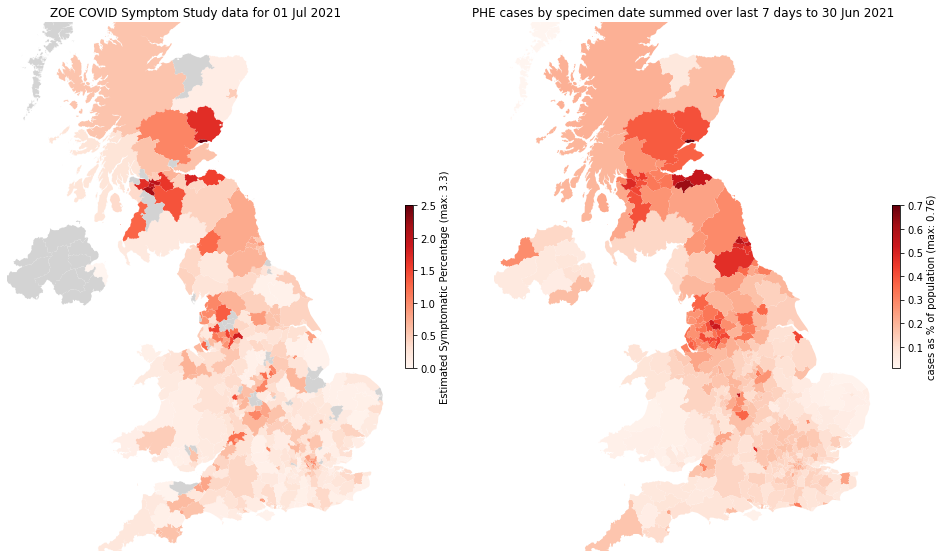

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...